In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Función auxiliar que nos va a servir para convertir todas las medidas en ms
def conversor_ms(texto):
    texto=texto.strip()
    if texto.endswith("ms"):
        return float(texto[:-2]) # Si ya es milisegundos lo dejamos como float
    elif texto.endswith("ns"):
        return 10**-6 * float(texto[:-2]) #milliseconds = nanoseconds ÷ 1,000,000 
    elif texto.endswith("μs"):
        return float(texto[:-2]) / 1000 #milliseconds = microseconds ÷ 1,000 
    elif texto.endswith("s"):
        return 1000 * float(texto[:-1])
    else:
        raise Exception("Invalid duration value")


# Análisis de Rendimiento - Histogramas

In [3]:
histograma = pd.read_csv("histograma.csv", header=0,index_col=0)
histograma

,230k,260k,518k,589k,921k,2M
Repa V1,1.402 s,1.767 s,3.227 s,4.578 s,6.213 s,13.77 s
Repa v2,798.3 ms,1.088 s,2.023 s,2.128 s,3.459 s,10.06 s
Repa V3,82.73 ms,115.9 ms,130.6 ms,106.2 ms,196.7 ms,394.8 ms
Acc : Interprete,926.0 ms,1.590 s,2.030 s,2.484 s,3.618 s,8.395 s
Acc : CPU,6.612 ms,7.247 ms,16.76 ms,16.56 ms,22.98 ms,48.81 ms
Acc : GPU,584.0 μs,629.2 μs,874.9 μs,881.1 μs,1.197 ms,3.485 ms


In [4]:
# Conversión de todas las unidades a ms
histograma = histograma.applymap(conversor_ms)
histograma

,230k,260k,518k,589k,921k,2M
Repa V1,1402.000,1767.0000,3227.0000,4578.0000,6213.000,13770.000
Repa v2,798.300,1088.0000,2023.0000,2128.0000,3459.000,10060.000
Repa V3,82.730,115.9000,130.6000,106.2000,196.700,394.800
Acc : Interprete,926.000,1590.0000,2030.0000,2484.0000,3618.000,8395.000
Acc : CPU,6.612,7.2470,16.7600,16.5600,22.980,48.810
Acc : GPU,0.584,0.6292,0.8749,0.8811,1.197,3.485


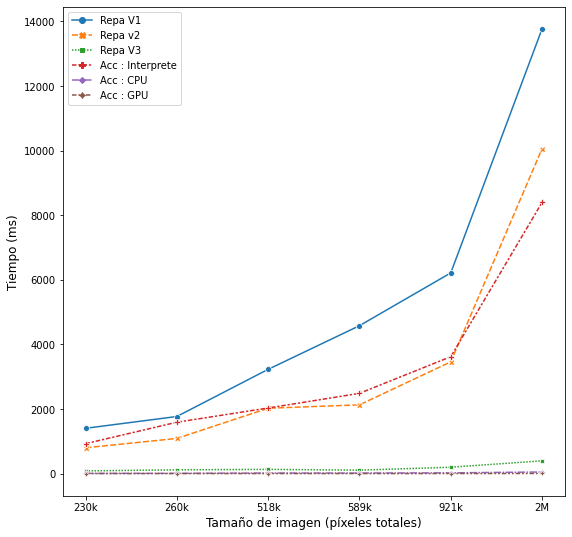

In [33]:
plt.figure(figsize=(9,9))
p = sns.lineplot(data=histograma.transpose(),markers=True)
p.set_xlabel("Tamaño de imagen (píxeles totales)", fontsize = 12)
p.set_ylabel("Tiempo (ms)", fontsize = 12)
plt.show()

# Análisis de Rendimiento - Grayscale

In [6]:
grayscale = pd.read_csv("grayscale.csv", header=0,index_col=0)
grayscale

,230k,260k,518k,589k,921k,2M
Repa V1,5.571 ms,7.855 ms,11.68 ms,13.11 ms,19.70 ms,43.14 ms
Repa v2,1.401 ms,2.209 ms,3.266 ms,3.469 ms,5.216 ms,10.64 ms
Acc : CPU,149.0 μs,405.6 μs,297.4 μs,409.0 μs,676.0 μs,1.749 ms
Acc : GPU,112.4 μs,139.8 μs,142.5 μs,133.4 μs,182.9 μs,317.5 μs


In [7]:
# Conversión de todas las unidades a ms
grayscale = grayscale.applymap(conversor_ms)
grayscale

,230k,260k,518k,589k,921k,2M
Repa V1,5.5710,7.8550,11.6800,13.1100,19.7000,43.1400
Repa v2,1.4010,2.2090,3.2660,3.4690,5.2160,10.6400
Acc : CPU,0.1490,0.4056,0.2974,0.4090,0.6760,1.7490
Acc : GPU,0.1124,0.1398,0.1425,0.1334,0.1829,0.3175


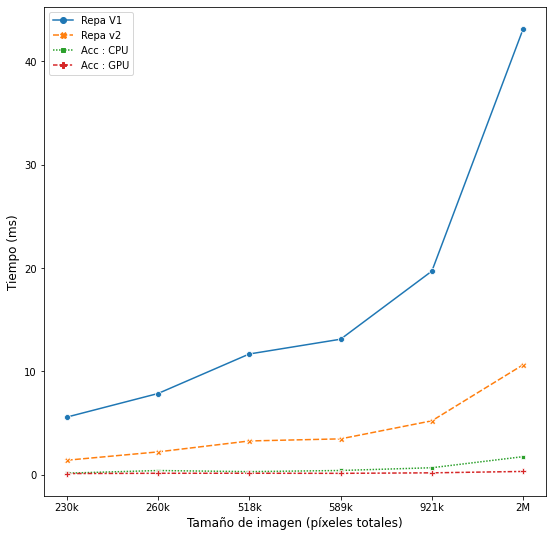

In [34]:
plt.figure(figsize=(9,9))
p = sns.lineplot(data=grayscale.transpose(),markers=True)
p.set_xlabel("Tamaño de imagen (píxeles totales)", fontsize = 12)
p.set_ylabel("Tiempo (ms)", fontsize = 12)
plt.show()

# Análisis de Rendimiento - Filtro Gaussiano

### Uso de Kernel 5x5

In [9]:
gauss5x5 = pd.read_csv("gaussblur5x5.csv",header=0,index_col=0)
gauss5x5

,230k,260k,518k,589k,921k,2M
Repa,5.105 ms,6.422 ms,16.82 ms,16.28 ms,20.57 ms,20.05 ms
Acc : CPU,484.2 μs,607.2 μs,1.263 ms,1.733 ms,1.592 ms,2.001 ms
Acc : GPU,355.3 μs,361.8 μs,555.4 μs,620.6 μs,877.8 μs,887.7 μs


In [10]:
# Conversión de todas las unidades a ms
gauss5x5 = gauss5x5.applymap(conversor_ms)
gauss5x5

,230k,260k,518k,589k,921k,2M
Repa,5.1050,6.4220,16.8200,16.2800,20.5700,20.0500
Acc : CPU,0.4842,0.6072,1.2630,1.7330,1.5920,2.0010
Acc : GPU,0.3553,0.3618,0.5554,0.6206,0.8778,0.8877


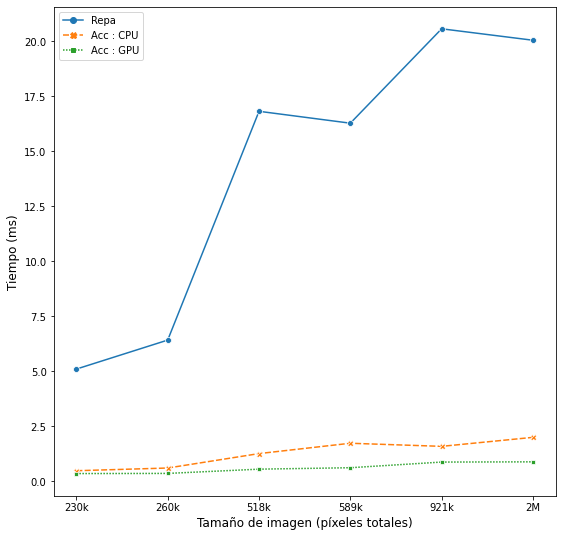

In [35]:
plt.figure(figsize=(9,9))
p = sns.lineplot(data=gauss5x5.transpose(),markers=True)
p.set_xlabel("Tamaño de imagen (píxeles totales)", fontsize = 12)
p.set_ylabel("Tiempo (ms)", fontsize = 12)
plt.show()

### Uso de separar y usar 2 kernels (1x5 y 5x1)

In [12]:
gauss1x5 = pd.read_csv("gaussblur1x55x1.csv",header=0,index_col=0)
gauss1x5

,230k,260k,518k,589k,921k,2M
Repa V1,8.668 ms,16.21 ms,16.14 ms,19.18 ms,25.99 ms,49.85 ms
Repa v2,12.65 ms,20.46 ms,26.06 ms,31.67 ms,41.30 ms,84.21 ms
Acc : CPU,6.986 ms,9.735 ms,8.346 ms,14.13 ms,12.62 ms,32.07 ms
Acc : GPU,1.248 ms,1.270 ms,1.409 ms,1.746 ms,1.584 ms,3.340 ms


In [13]:
# Conversión de todas las unidades a ms
gauss1x5 = gauss1x5.applymap(conversor_ms)
gauss1x5

,230k,260k,518k,589k,921k,2M
Repa V1,8.668,16.210,16.140,19.180,25.990,49.85
Repa v2,12.650,20.460,26.060,31.670,41.300,84.21
Acc : CPU,6.986,9.735,8.346,14.130,12.620,32.07
Acc : GPU,1.248,1.270,1.409,1.746,1.584,3.34


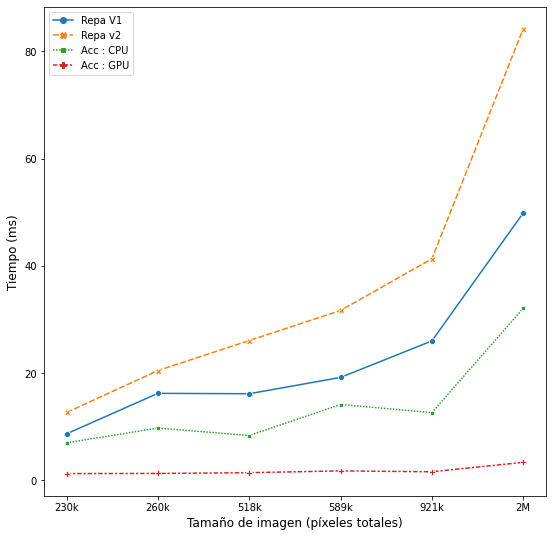

In [36]:
plt.figure(figsize=(9,9))
p = sns.lineplot(data=gauss1x5.transpose(),markers=True)
p.set_xlabel("Tamaño de imagen (píxeles totales)", fontsize = 12)
p.set_ylabel("Tiempo (ms)", fontsize = 12)
plt.show()

# Análisis de Rendimiento - Filtro Media

In [15]:
mean = pd.read_csv("mean.csv", header=0,index_col=0)
mean

,230k,260k,518k,589k,921k,2M
Repa,7.037 ns,8.682 ns,6.732 ns,6.580 ns,7.518 ns,7.312 ns
Acc : CPU,9.569 ms,7.977 ms,12.01 ms,12.67 ms,17.83 ms,40.87 ms
Acc : GPU,1.284 ms,13.94 ns,1.448 ms,2.020 ms,2.400 ms,4.688 ms


In [16]:
# Conversión de todas las unidades a ms
mean = mean.applymap(conversor_ms)
mean

,230k,260k,518k,589k,921k,2M
Repa,0.000007,0.000009,0.000007,0.000007,0.000008,0.000007
Acc : CPU,9.569000,7.977000,12.010000,12.670000,17.830000,40.870000
Acc : GPU,1.284000,0.000014,1.448000,2.020000,2.400000,4.688000


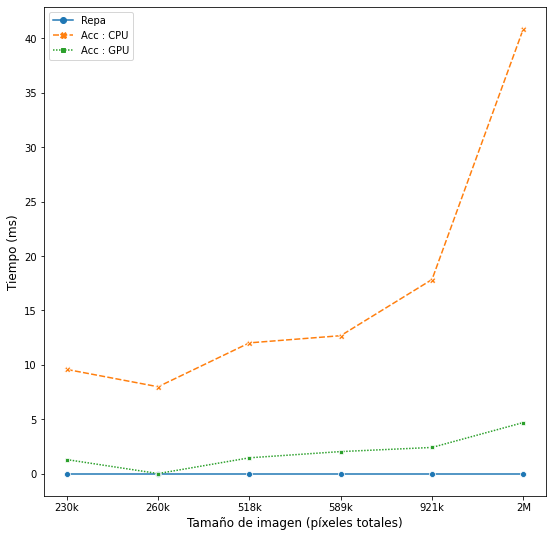

In [37]:
plt.figure(figsize=(9,9))
p = sns.lineplot(data=mean.transpose(),markers=True)
p.set_xlabel("Tamaño de imagen (píxeles totales)", fontsize = 12)
p.set_ylabel("Tiempo (ms)", fontsize = 12)
plt.show()

# Análisis de Rendimiento - Sobel

In [18]:
sobel = pd.read_csv("sobel.csv", header=0,index_col=0)
sobel

,230k,260k,518k,589k,921k,2M
Repa,5.484 ms,7.145 ms,11.33 ms,12.28 ms,21.01 ms,43.21 ms
Acc : CPU,3.537 ms,3.182 ms,3.963 ms,5.289 ms,6.767 ms,14.96 ms
Acc : GPU,493.1 μs,532.9 μs,552.5 μs,706.6 μs,785.7 μs,1.609 ms


In [19]:
# Conversión de todas las unidades a ms
sobel = sobel.applymap(conversor_ms)
sobel

,230k,260k,518k,589k,921k,2M
Repa,5.4840,7.1450,11.3300,12.2800,21.0100,43.210
Acc : CPU,3.5370,3.1820,3.9630,5.2890,6.7670,14.960
Acc : GPU,0.4931,0.5329,0.5525,0.7066,0.7857,1.609


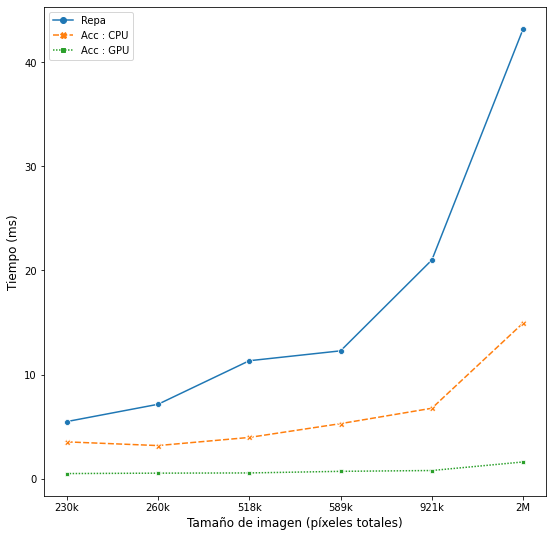

In [38]:
plt.figure(figsize=(9,9))
p = sns.lineplot(data=sobel.transpose(),markers=True)
p.set_xlabel("Tamaño de imagen (píxeles totales)", fontsize = 12)
p.set_ylabel("Tiempo (ms)", fontsize = 12)
plt.show()

# Análisis de Rendimiento - Filtro Laplaciano

In [21]:
laplace = pd.read_csv("laplace.csv", header=0,index_col=0)
laplace

,230k,260k,518k,589k,921k,2M
Repa,5.240 ms,6.106 ms,10.98 ms,12.03 ms,19.64 ms,19.65 ms
Acc : CPU,237.3 μs,304.3 μs,1.365 ms,751.7 μs,998.5 μs,963.5 μs
Acc : GPU,222.9 μs,226.9 μs,308.4 μs,343.1 μs,351.8 μs,340.3 μs


In [22]:
# Conversión de todas las unidades a ms
laplace = laplace.applymap(conversor_ms)
laplace

,230k,260k,518k,589k,921k,2M
Repa,5.2400,6.1060,10.9800,12.0300,19.6400,19.6500
Acc : CPU,0.2373,0.3043,1.3650,0.7517,0.9985,0.9635
Acc : GPU,0.2229,0.2269,0.3084,0.3431,0.3518,0.3403


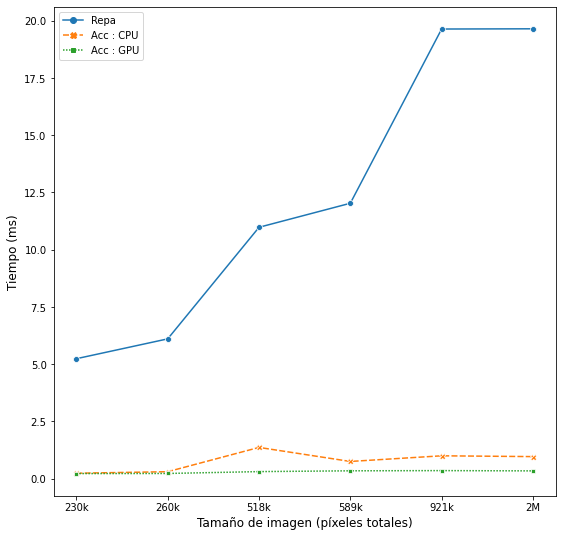

In [39]:
plt.figure(figsize=(9,9))
p = sns.lineplot(data=laplace.transpose(),markers=True)
p.set_xlabel("Tamaño de imagen (píxeles totales)", fontsize = 12)
p.set_ylabel("Tiempo (ms)", fontsize = 12)
plt.show()